In [1]:
!ls /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/GAN_sample_fid

BigGAN_1000cls_std07_invert	pink_noise
BigGAN_std_008			resnet50_linf8_gradevol
BigGAN_trunc07			resnet50_linf8_gradevol_avgpool
BigGAN_trunc07_dog_images.pkl	resnet50_linf8_gradevol_layer3
BigGAN_trunc07_results_all.pkl	resnet50_linf8_gradevol_layer4
DeePSim_4std			summary


In [5]:
# Import required libraries for YOLO
from ultralytics import YOLO
import glob
from tqdm.auto import tqdm
import os
import torch
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
from os.path import join
import pickle

def count_total_images(imgdir):
    return len(glob.glob(os.path.join(imgdir, "*.png")))


def detect_dog_dataset(imgdir, dataset_str, outdir, verbose=False):
    model = YOLO('yolov8n.pt')  # Load YOLOv8 nano model
    model.to('cuda')  # Move model to GPU

    # Get all jpg images in the directory
    image_files = sorted(glob.glob(os.path.join(imgdir, "*.png")))

    # Dictionary to store dog images
    dog_images = {}
    results_all = []
    # Set batch size
    batch_size = 128

    # Process images in batches
    for i in tqdm(range(0, len(image_files), batch_size), desc="Detecting dogs"):
        batch_files = image_files[i:i + batch_size]
        
        # Run inference on batch
        results = model(batch_files, device='cuda', verbose=verbose)
        results_all.extend(results)
        # Process results for each image in batch
        for img_path, result in zip(batch_files, results):
            boxes = result.boxes
            for box in boxes:
                if box.cls == 16:  # If dog detected
                    confidence = box.conf.item()
                    dog_images[img_path] = box #confidence
                    break

    print(f"Found {len(dog_images)} images containing dogs")
    pickle.dump(results_all, open(join(outdir, f"{dataset_str}_results_all.pkl"), "wb"))
    pickle.dump(dog_images, open(join(outdir, f"{dataset_str}_dog_images.pkl"), "wb"))
    return dog_images, results_all

In [ ]:
dataset_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/GAN_sample_fid"
dataset_str = "BigGAN_trunc07"
imgdir = join(dataset_root, dataset_str)
# Load the YOLO model and move to GPU

In [3]:
dataset_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/GAN_sample_fid"

outdir = join(dataset_root, f"yolo_dog_detection")
os.makedirs(outdir, exist_ok=True)

dataset_str = "BigGAN_trunc07"
imgdir = join(dataset_root, dataset_str)



In [4]:
!ls {dataset_root}

BigGAN_1000cls_std07_invert	resnet50_linf8_gradevol
BigGAN_std_008			resnet50_linf8_gradevol_avgpool
BigGAN_trunc07			resnet50_linf8_gradevol_layer3
BigGAN_trunc07_dog_images.pkl	resnet50_linf8_gradevol_layer4
BigGAN_trunc07_results_all.pkl	summary
DeePSim_4std			yolo_dog_detection
pink_noise


In [6]:
dataset_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/GAN_sample_fid"

outdir = join(dataset_root, f"yolo_dog_detection")
os.makedirs(outdir, exist_ok=True)
for dataset_str in ["resnet50_linf8_gradevol", 
                    "resnet50_linf8_gradevol_avgpool", 
                    "resnet50_linf8_gradevol_layer4", 
                    "resnet50_linf8_gradevol_layer3",
                    "DeePSim_4std",
                    "BigGAN_std_008"]:
    imgdir = join(dataset_root, dataset_str)
    results_dog_imgs, results_all = detect_dog_dataset(imgdir, dataset_str, outdir)

Detecting dogs:   0%|          | 0/391 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
dataset_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/GAN_sample_fid"

outdir = join(dataset_root, f"yolo_dog_detection")
os.makedirs(outdir, exist_ok=True)
for dataset_str in ["resnet50_linf8_gradevol", 
                    "resnet50_linf8_gradevol_avgpool", 
                    "resnet50_linf8_gradevol_layer4", 
                    "resnet50_linf8_gradevol_layer3",
                    "DeePSim_4std",
                    "BigGAN_std_008"]:
    imgdir = join(dataset_root, dataset_str)
    n_total = count_total_images(imgdir)
    print(f"{dataset_str}: {n_total}")

### Synopsis

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from circuit_toolkit.plot_utils import saveallforms
savedir = "E:\OneDrive - Harvard University\Manuscript_BigGAN\Figures\Figure_rebuttal_dog_frequency"

In [1]:
# Data preparation
data = {
    "Model": [
        "BigGAN (ImageNet)", "BigGAN (EcoSet)", 
        "resnet50_linf8_gradevol", "resnet50_linf8_gradevol_avgpool", 
        "resnet50_linf8_gradevol_layer4", "resnet50_linf8_gradevol_layer3", 
        "DeePSim_4std", "BigGAN_std_008"
    ],
    "Numerator": [6037, 846, 4064, 3169, 178, 3682, 4542, 9245],
    "Denominator": [50000, 50000, 50000, 51200, 2332, 51200, 50000, 50000],
    "Percentage (%)": [
        6037 / 50000 * 100, 846 / 50000 * 100, 
        4064 / 50000 * 100, 3169 / 51200 * 100, 
        178 / 2332 * 100, 3682 / 51200 * 100, 
        4542 / 50000 * 100, 9245 / 50000 * 100
    ]
}
# Create DataFrame
df = pd.DataFrame(data)

In [11]:
df['Model'] = df['Model'].replace({
    "BigGAN_std_008": "BigGAN (ImageNet,RND)",
    "BigGAN (ImageNet)": "BigGAN (ImageNet)", 
    "DeePSim_4std": "DeePSim",
    "resnet50_linf8_gradevol": "DeePSim Evol (ResNet50-linf8-fc)",
    "resnet50_linf8_gradevol_avgpool": "DeePSim Evol (ResNet50-linf8-avgpool)", 
    "resnet50_linf8_gradevol_layer4": "DeePSim Evol (ResNet50-linf8-layer4)",
    "resnet50_linf8_gradevol_layer3": "DeePSim Evol (ResNet50-linf8-layer3)"
})
df["Percentage (%)"] = df["Numerator"] / df["Denominator"] * 100
# Add model type column
df["ModelType"] = df["Model"].apply(lambda x: "BigGAN" if "BigGAN" in x else "DeePSim")
# Add dataset column 
df["Dataset"] = df["Model"].apply(lambda x: "EcoSet" if "EcoSet" in x else "ImageNet")

In [30]:
df

,Model,Numerator,Denominator,Percentage (%),ModelType,Dataset
0,BigGAN (ImageNet),6037,50000,12.074000,BigGAN,ImageNet
1,BigGAN (EcoSet),846,50000,1.692000,BigGAN,EcoSet
2,DeePSim Evol (ResNet50-linf8-fc),4064,50000,8.128000,DeePSim,ImageNet
3,DeePSim Evol (ResNet50-linf8-avgpool),3169,51200,6.189453,DeePSim,ImageNet
4,DeePSim Evol (ResNet50-linf8-layer4),178,2332,7.632933,DeePSim,ImageNet
5,DeePSim Evol (ResNet50-linf8-layer3),3682,51200,7.191406,DeePSim,ImageNet
6,DeePSim,4542,50000,9.084000,DeePSim,ImageNet
7,"BigGAN (ImageNet,RND)",9245,50000,18.490000,BigGAN,ImageNet


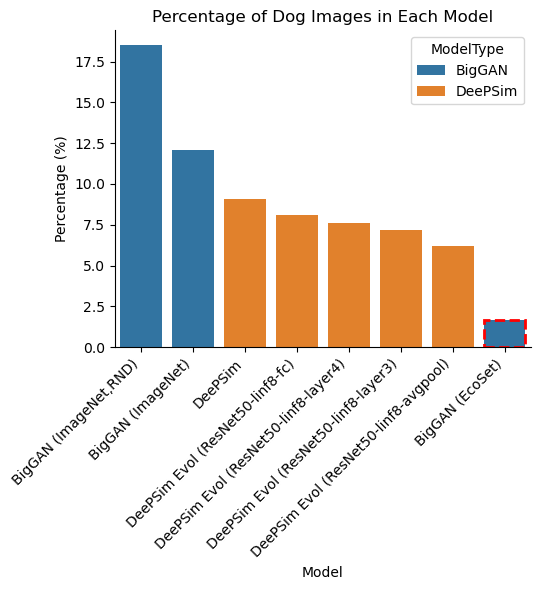

In [44]:
# Create a bar plot
figh, ax = plt.subplots(figsize=(5.5, 6))
sns.barplot(x='Model', y='Percentage (%)', data=df, order=df.sort_values('Percentage (%)', ascending=False).Model, hue="ModelType") 
# Add highlight for EcoSet model
# Get the height of the EcoSet bar
ecoset_height = df[df['Dataset'] == 'EcoSet']['Percentage (%)'].iloc[0]
# Find the patch with matching height
bar_width = ax.patches[0].get_width()  # Width is same for all bars
for patch in ax.patches:
    if abs(patch.get_height() - ecoset_height) < 0.01:  # Allow small numerical difference
        bar_pos = patch.get_x()
        bar_height = patch.get_height()
        break

plt.gca().add_patch(plt.Rectangle((bar_pos, 0), bar_width, bar_height, 
                                 fill=False, linestyle='--', color='red', linewidth=2))


plt.xlabel('Model')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Dog Images in Each Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
saveallforms(savedir, "dataset_dog_detection_percentage_barplot_polished")
plt.show()


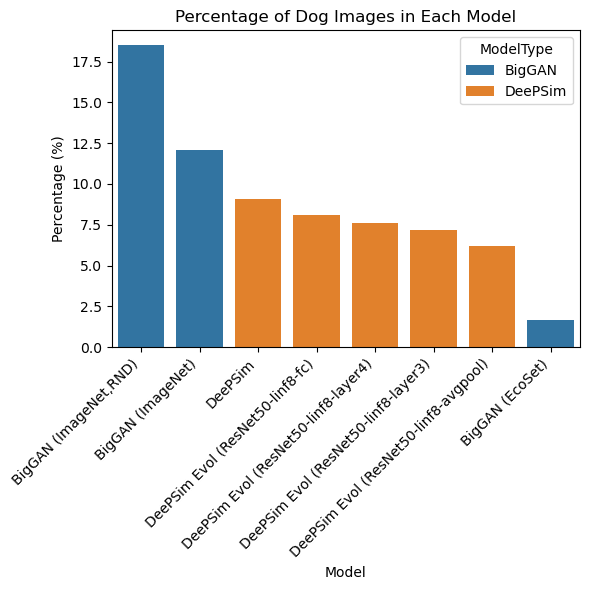

In [ ]:
# Create a bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x='Model', y='Percentage (%)', data=df, order=df.sort_values('Percentage (%)', ascending=False).Model, hue="ModelType", ) # "Dataset"
plt.xlabel('Model')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Dog Images in Each Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

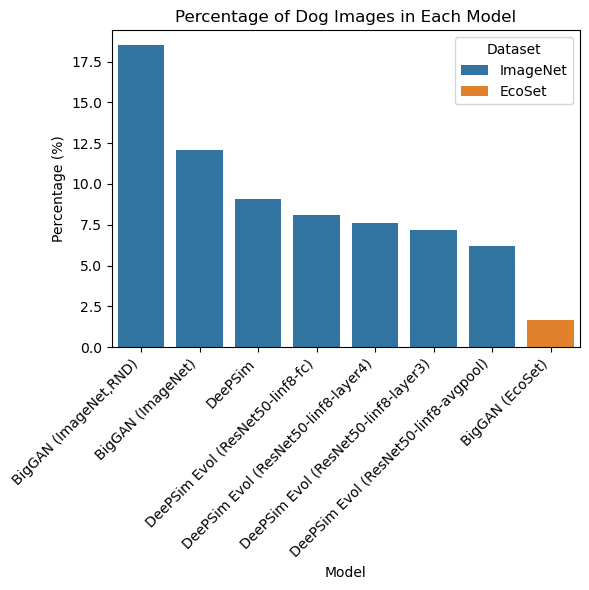

In [17]:
# Create a bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x='Model', y='Percentage (%)', data=df, order=df.sort_values('Percentage (%)', ascending=False).Model, hue="Dataset", ) # "Dataset"
plt.xlabel('Model')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Dog Images in Each Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
